In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/91861/Desktop/ml3/spam.csv", encoding='latin1')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3298,ham,Honeybee Said: *I'm d Sweetest in d World* God...,NaN,NaN,NaN
4782,ham,Especially since i talk about boston all up in...,NaN,NaN,NaN
842,ham,Our Prashanthettan's mother passed away last n...,NaN,NaN,NaN
683,spam,Hi I'm sue. I am 20 years old and work as a la...,NaN,NaN,NaN
861,ham,Your brother is a genius,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
# 1. Data cleaning
# 2. EDA(exploratory data analysis)
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1.Data cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# drop last 3 col
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.sample(5)

,v1,v2
4292,ham,You best watch what you say cause I get drunk ...
1091,ham,Please da call me any mistake from my side sor...
267,spam,Ur ringtone service has changed! 25 Free credi...
3780,ham,"Dear friends, sorry for the late information. ..."
3504,ham,"life alle mone,eppolum oru pole allalo"


In [11]:
#rename column
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
638,ham,"What will we do in the shower, baby?"
5263,ham,Pls speak with me. I wont ask anything other t...
3470,ham,Heart is empty without love.. Mind is empty wi...
2034,ham,Is avatar supposed to have subtoitles
2739,ham,Are you this much buzy


In [12]:
from sklearn .preprocessing import LabelEncoder
encoder=LabelEncoder()

In [15]:
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
# check for duplicate values
df.duplicated().sum()

403

In [20]:
# remove duplicates
df = df.drop_duplicates(keep='first')

df.duplicated().sum()

0

In [22]:
df.shape

(5169, 2)

## 2.EDA

In [23]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

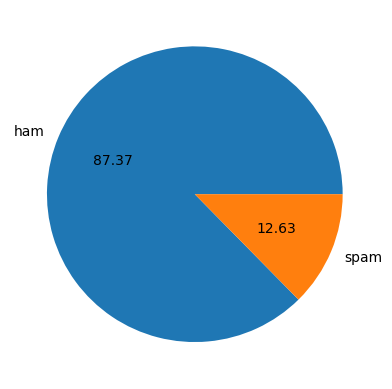

In [25]:

import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [26]:

# Data is imbalanced

In [27]:


!pip install nltk

In [39]:

import nltk


In [40]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91861\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
df['num_characters'] = df['text'].apply(len)


In [42]:

df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [48]:
nltk.download('punkt', download_dir='C:/Users/91861/nltk_data')


[nltk_data] Downloading package punkt to C:/Users/91861/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
import nltk
nltk.data.path.append('C:/Users/91861/nltk_data')


In [50]:
from nltk.tokenize import word_tokenize

df['num_words'] = df['text'].apply(lambda x: len(word_tokenize(x)))


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\91861/nltk_data'
    - 'C:\\Users\\91861\\anaconda3\\nltk_data'
    - 'C:\\Users\\91861\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\91861\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\91861\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:/Users/91861/nltk_data'
    - 'C:/Users/91861/nltk_data'
**********************************************************************


In [51]:
df['num_words'] = df['text'].apply(lambda x: len(x.split()))


In [52]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [54]:

import re

df['num_sentences'] = df['text'].apply(lambda x: len(re.findall(r'[.!?]+', x)))


In [55]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0


In [56]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,1.846779
std,58.236293,11.068488,1.745441
min,2.000000,1.000000,0.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,39.000000


In [57]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.692648
std,56.358207,11.116240,1.681598
min,2.000000,1.000000,0.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,39.000000


In [58]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.912711
std,30.137753,5.967672,1.806610
min,13.000000,2.000000,0.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


In [59]:

import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

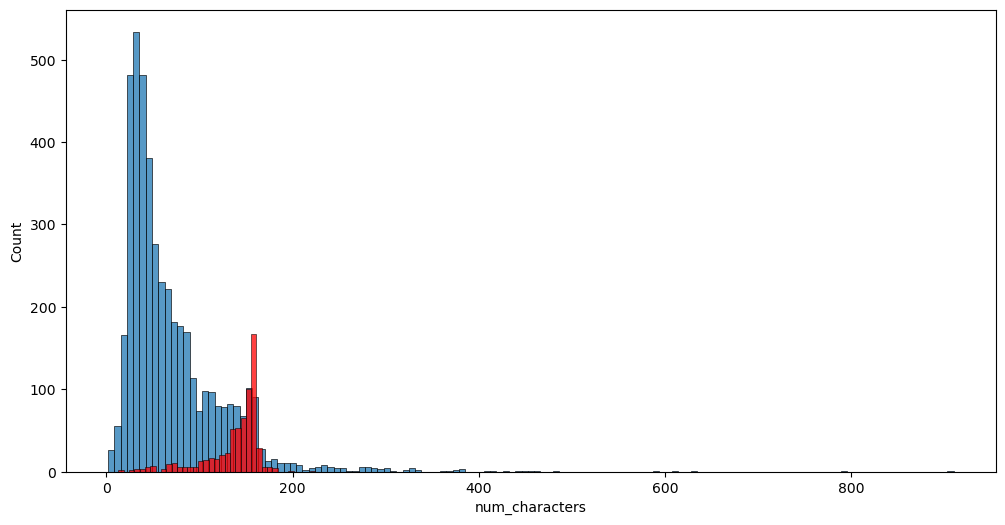

In [60]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

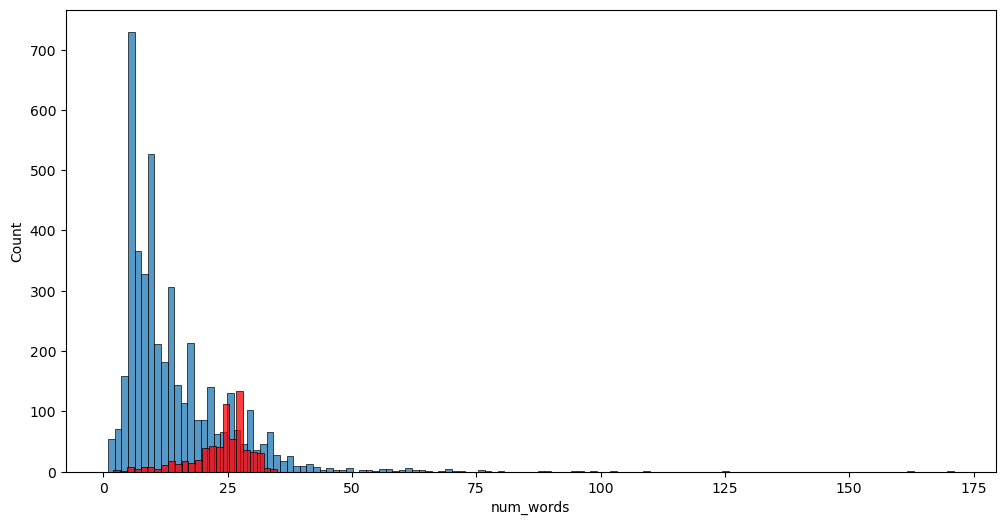

In [61]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

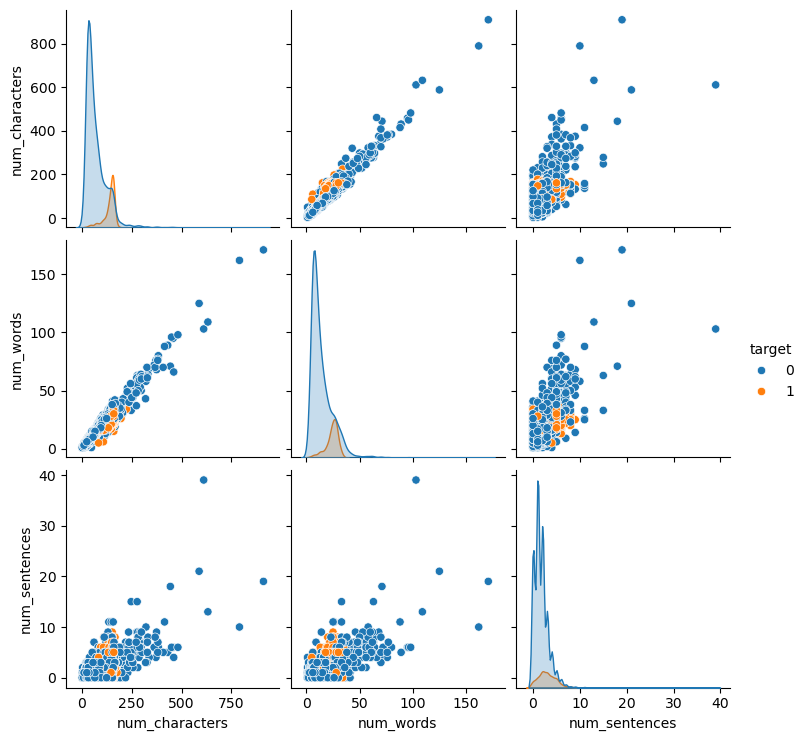

In [62]:
sns.pairplot(df,hue='target')

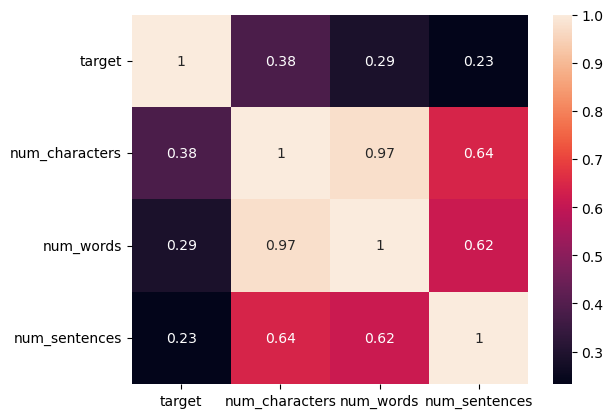

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot heatmap
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()


## 3.Data preprocessing
Lower case,
Tokenization,
Removing special characters,
Removing stop words and punctuation,
Stemming

In [66]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [68]:
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer  # Optional: if you're okay using this part of NLTK

# If you want to fully avoid NLTK, we can write a very simple custom stemmer, but accuracy will drop.

ps = PorterStemmer()

def transform_text(text):
    # Lowercase
    text = text.lower()
    
    # Tokenize using regex
    tokens = re.findall(r'\b\w+\b', text)
    
    # Filter alphanumeric
    tokens = [i for i in tokens if i.isalnum()]
    
    # Remove stopwords and punctuation
    tokens = [i for i in tokens if i not in ENGLISH_STOP_WORDS and i not in string.punctuation]
    
    # Stemming
    tokens = [ps.stem(i) for i in tokens]
    
    return " ".join(tokens)


In [69]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'm gonna home soon don t want talk stuff anymor tonight k ve cri today'

In [70]:

df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [71]:
df['transformed_text'] = df['text'].apply(transform_text)

In [72]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,nah don t think goe usf live


In [74]:
!pip install wordcloud


In [75]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [76]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


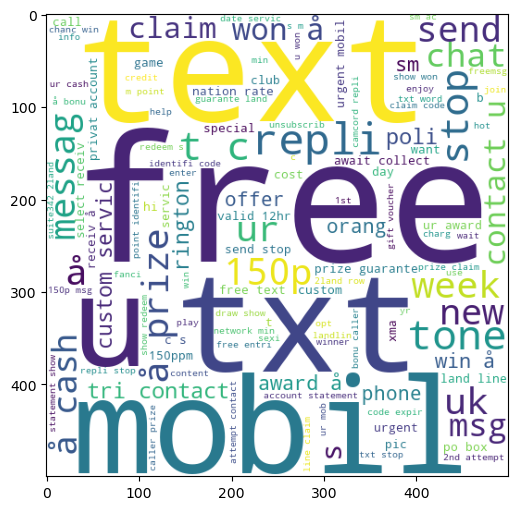

In [79]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [80]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

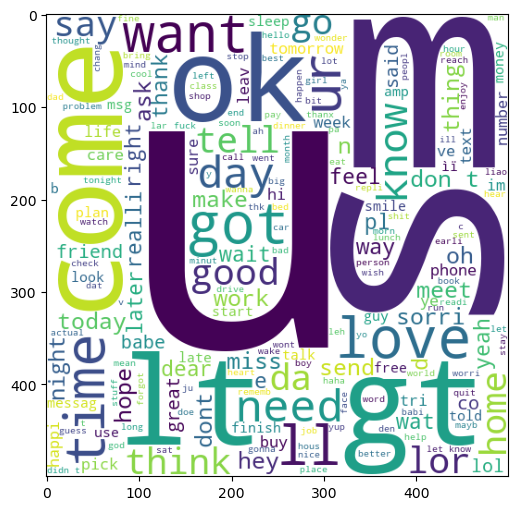

In [81]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [82]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [83]:
len(spam_corpus)

11399

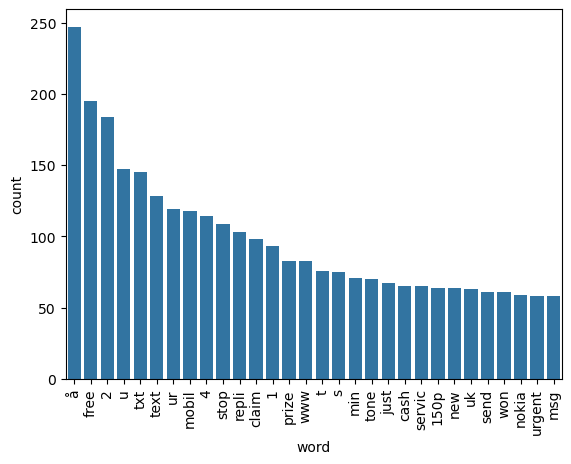

In [87]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the 30 most common words and their counts
common_words = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
df_common = pd.DataFrame(common_words, columns=['word', 'count'])

# Create the barplot using keyword arguments
sns.barplot(x='word', y='count', data=df_common)
plt.xticks(rotation='vertical')
plt.show()




In [88]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [89]:
len(ham_corpus)

34816

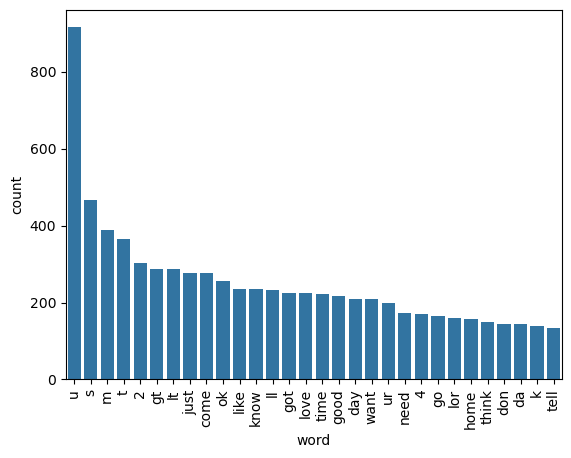

In [90]:
common_words = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
df_common = pd.DataFrame(common_words, columns=['word', 'count'])

# Create the barplot using keyword arguments
sns.barplot(x='word', y='count', data=df_common)
plt.xticks(rotation='vertical')
plt.show()

## 4.Model building

In [134]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [135]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [136]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [137]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [138]:

X.shape

(5169, 3000)

In [139]:

y = df['target'].values

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)



In [142]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [143]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [144]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.867504835589942
[[779 117]
 [ 20 118]]
0.502127659574468


In [145]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.97678916827853
[[896   0]
 [ 24 114]]
1.0


In [146]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9854932301740812
[[895   1]
 [ 14 124]]
0.992


In [147]:

# tfidf --> MNB

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [149]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [150]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
   
}

In [151]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [152]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9777562862669246, 0.9752066115702479)

In [153]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9777562862669246
Precision -  0.9752066115702479
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.97678916827853
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.9024390243902439
For  LR
Accuracy -  0.960348162475822
Precision -  0.9619047619047619
For  RF
Accuracy -  0.9806576402321083
Precision -  0.9836065573770492


C:\Users\91861\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9700193423597679
Precision -  0.9652173913043478
For  BgC
Accuracy -  0.9700193423597679
Precision -  0.9147286821705426
For  ETC
Accuracy -  0.9816247582205029
Precision -  0.976
For  GBDT
Accuracy -  0.9497098646034816
Precision -  1.0


In [154]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [156]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.976789,1.000000
9,GBDT,0.949710,1.000000
5,RF,0.980658,0.983607
8,ETC,0.981625,0.976000
0,SVC,0.977756,0.975207
6,AdaBoost,0.970019,0.965217
4,LR,0.960348,0.961905
7,BgC,0.970019,0.914729
3,DT,0.930368,0.902439


In [157]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [158]:
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.976789
2,GBDT,Accuracy,0.949710
3,RF,Accuracy,0.980658
4,ETC,Accuracy,0.981625
5,SVC,Accuracy,0.977756
6,AdaBoost,Accuracy,0.970019
7,LR,Accuracy,0.960348
8,BgC,Accuracy,0.970019
9,DT,Accuracy,0.930368


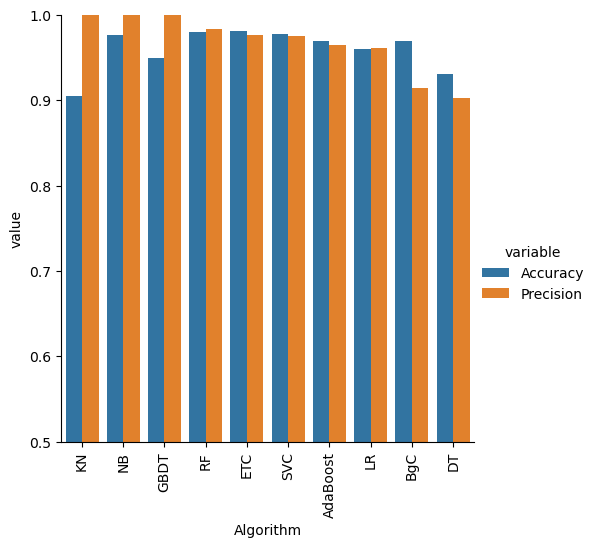

In [159]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [160]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [161]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [162]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [163]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [164]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [165]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [166]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.976789,1.000000,0.976789,1.000000,0.976789,1.000000,0.976789,1.000000
2,GBDT,0.949710,1.000000,0.949710,1.000000,0.949710,1.000000,0.949710,1.000000
3,RF,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607
4,ETC,0.981625,0.976000,0.981625,0.976000,0.981625,0.976000,0.981625,0.976000
5,SVC,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207
6,AdaBoost,0.970019,0.965217,0.970019,0.965217,0.970019,0.965217,0.970019,0.965217
7,LR,0.960348,0.961905,0.960348,0.961905,0.960348,0.961905,0.960348,0.961905
8,BgC,0.970019,0.914729,0.970019,0.914729,0.970019,0.914729,0.970019,0.914729
9,DT,0.930368,0.902439,0.930368,0.902439,0.930368,0.902439,0.930368,0.902439


In [167]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [168]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [169]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [170]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [171]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.9919354838709677


In [172]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [173]:
from sklearn.ensemble import StackingClassifier

In [174]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [175]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.9552238805970149


## PipeLine

In [176]:
import pickle
pickle.dump(tfidf,open('vectorizer1.pkl','wb'))
pickle.dump(mnb,open('model1.pkl','wb'))